Question 1 :
An airline tracks flight delays (in minutes) for 20 flights. Analyze the flight delays to calculate percentiles, detect outliers, and evaluate the overall distribution.
DataSet:
delays = [15, 30, 45, 20, 25, 100, 5, 60, 35, 50, 
          120, 80, 10, 75, 90, 200, 55, 40, 70, 150]
Expected Output:

Percentiles (10th, 25th, 50th, 75th, 90th): [ 14.5   28.75  52.5   82.5  123.  ]
IQR: 53.75
Outliers: [200]


In [1]:
import warnings
warnings.filterwarnings('ignore')

Percentiles (10th, 25th, 50th, 75th, 90th):[ 14.5   28.75  52.5   82.5  123.  ]
IQR:53.75
Outliers:[200]


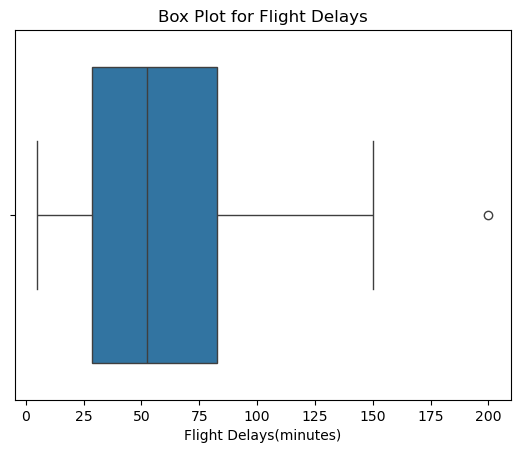

In [3]:
import pandas as pd
import numpy as np
delays = [15, 30, 45, 20, 25, 100, 5, 60, 35, 50, 
          120, 80, 10, 75, 90, 200, 55, 40, 70, 150]
percentile=[np.percentile(delays,[10,25,50,75,90])][0]
print(f"Percentiles (10th, 25th, 50th, 75th, 90th):{percentile}")
q3=np.percentile(delays,75)
q1=np.percentile(delays,25)
IQR=q3-q1
print(f"IQR:{IQR}")
outliers=[i for i in delays if i<(q1-1.5*IQR) or i>(q3+1.5*IQR)]
print(f"Outliers:{outliers}")
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=delays)
plt.xlabel("Flight Delays(minutes)")
plt.title("Box Plot for Flight Delays")
plt.show()

Question 2 :
A company wants to analyze the salary distribution of its employees to understand the central tendency and determine whether the data is skewed.
DataSet:
salaries = [30000, 32000, 35000, 37000, 40000, 42000, 45000, 47000, 50000, 55000,
            60000, 62000, 65000, 67000, 70000, 72000, 75000, 80000, 85000, 90000]
Expected Output:
Mean Salary: 56950.0
Median Salary: 57500.0
Mode Salary: 30000
The data is Left Skewed (Negative Skew)


Mean Salary:56950.0
Median Salary:57500.0
Mode Salary:30000
The data is Left Skewed(Negative Skew)


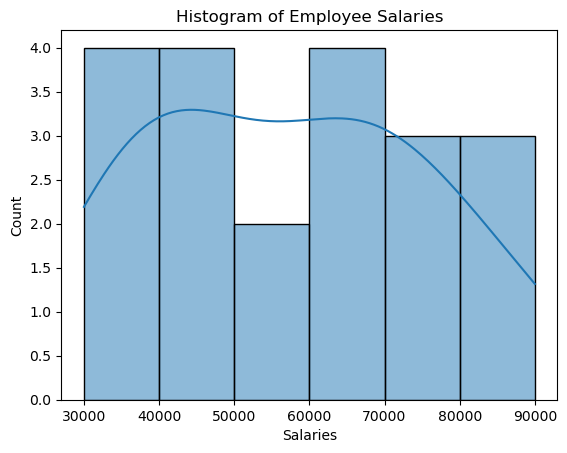

In [154]:
from scipy import stats
salaries = [30000, 32000, 35000, 37000, 40000, 42000, 45000, 47000, 50000, 55000,
            60000, 62000, 65000, 67000, 70000, 72000, 75000, 80000, 85000, 90000]
df=pd.DataFrame(salaries,columns=["Salaries"])
salary_mean=df['Salaries'].mean()
salary_median=df['Salaries'].median()
salary_mode=df['Salaries'].mode()[0]
print(f"Mean Salary:{salary_mean}")
print(f"Median Salary:{salary_median}")
print(f"Mode Salary:{salary_mode}")
#Skewness check
if salary_mean>salary_median:
    print("The data is Right Skewed(Positive Skew)")
elif salary_mean < salary_median:
    print("The data is Left Skewed(Negative Skew)")
else:
    print("The data is symmetrical")
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x=df['Salaries'],kde=True)
plt.title("Histogram of Employee Salaries")
plt.show()

Question 3:
 A school wants to analyze the exam performance of students across three subjects: Mathematics, Science, and English. How can Data Science concepts be applied to understand their performance?
DataSet:
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Mathematics': [85, 78, 92, 88, 70, 95, 60, 80, 90, 76],
    'Science': [80, 85, 88, 70, 75, 92, 55, 82, 89, 78],
    'English': [78, 74, 85, 80, 68, 90, 50, 77, 83, 72]
}
Expected Output:
Descriptive Statistics
Histogram(graph)
Correlation Analysis(graph)
HeatMap(graph)


In [205]:
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Mathematics': [85, 78, 92, 88, 70, 95, 60, 80, 90, 76],
    'Science': [80, 85, 88, 70, 75, 92, 55, 82, 89, 78],
    'English': [78, 74, 85, 80, 68, 90, 50, 77, 83, 72]
}
df=pd.DataFrame(data)
print("Descriptive Statistics:\n",df.describe())


Descriptive Statistics:
        Mathematics    Science    English
count    10.000000  10.000000  10.000000
mean     81.400000  79.400000  75.700000
std      10.844353  10.895463  11.086027
min      60.000000  55.000000  50.000000
25%      76.500000  75.750000  72.500000
50%      82.500000  81.000000  77.500000
75%      89.500000  87.250000  82.250000
max      95.000000  92.000000  90.000000


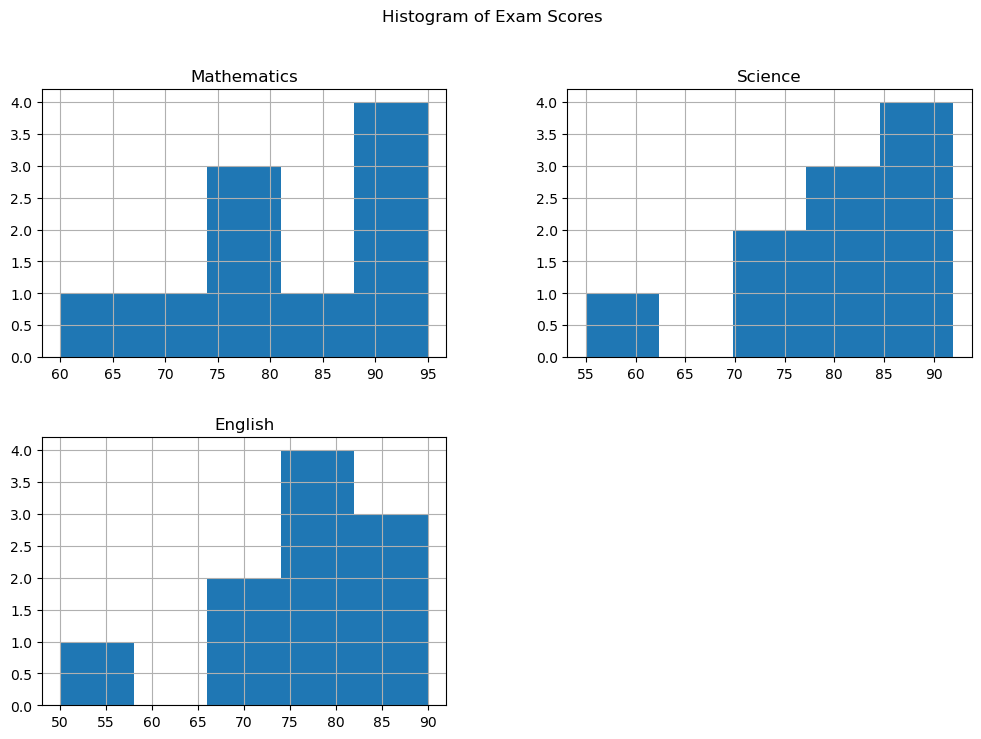

In [201]:
#Histogram
df[['Mathematics','Science','English']].hist(bins=5,figsize=(12,8))
plt.suptitle('Histogram of Exam Scores')
plt.show()

In [213]:
#correlation Analysis
correlation_matrix=df[['Mathematics','Science','English']].corr()
print("Correlation Analysis:\n",correlation_matrix)

Correlation Analysis:
              Mathematics   Science   English
Mathematics     1.000000  0.792185  0.974318
Science         0.792185  1.000000  0.874999
English         0.974318  0.874999  1.000000


<Axes: >

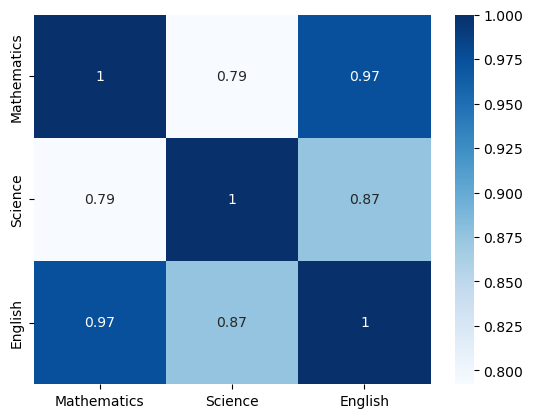

In [223]:
#Heatmap
sns.heatmap(correlation_matrix,annot=True,cmap='Blues')

Question 4:
A pharmaceutical company conducted a clinical trial with two groups: one receiving medication and the other a placebo. How do you perform a hypothesis test to determine the effectiveness of the medication?
Dataset:
medication_group = [110, 115, 108, 102, 107, 99, 111, 104, 109, 101]
placebo_group = [120, 125, 130, 122, 128, 119, 124, 127, 123, 126]
Expected Output:
T-Statistic: -9.201427649220966
P-Value: 3.163912817600812e-08
Reject the null hypothesis: The medication is effective


In [233]:
medication_group = [110, 115, 108, 102, 107, 99, 111, 104, 109, 101]
placebo_group = [120, 125, 130, 122, 128, 119, 124, 127, 123, 126]
t_stat,p_val=stats.ttest_ind(medication_group,placebo_group)
print("T-Statistic:",t_stat)
print("P-Value:",p_val)
if p_val<0.05:
    print("Reject the null hypothesis: The medication is effective.")
if p_val>0.05:
    print("Fail to reject the null hypothesis: The medication is effective.")

T-Statistic: -9.201427649220966
P-Value: 3.163912817600812e-08
Reject the null hypothesis: The medication is effective.


Question 5 : A company conducted a customer satisfaction survey where customers rated their experience on a scale of 1 to 10. Analyze the survey results to calculate descriptive statistics and visualize the distribution of customer satisfaction ratings.
Sample DataSet:  
ratings = [8, 9, 7, 5, 6, 10, 9, 4, 7, 8, 
           6, 9, 10, 5, 8, 7, 6, 9, 10, 7]
Expected Output:
Mean Rating: 7.5
Median Rating: 7.5
Mode Rating: 7
Standard Deviation: 1.746424919657298


In [267]:
ratings = [8, 9, 7, 5, 6, 10, 9, 4, 7, 8, 
           6, 9, 10, 5, 8, 7, 6, 9, 10, 7]
mean_r=np.mean(ratings)
median_r=np.median(ratings)
mode_r=stats.mode(ratings,keepdims=True).mode[0]
std_r=np.std(ratings)
print("Mean Rating:",mean_r)
print("Median Rating:",median_r)
print("Mode Rating:",mode_r)
print("Standard Deviation:",std_r)

Mean Rating: 7.5
Median Rating: 7.5
Mode Rating: 7
Standard Deviation: 1.746424919657298


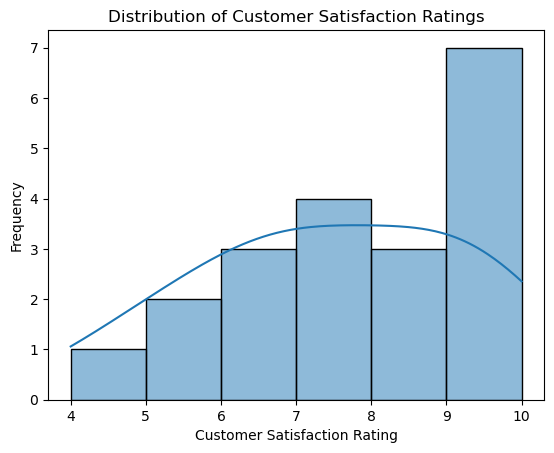

In [269]:
sns.histplot(x=ratings,kde=True)
plt.title("Distribution of Customer Satisfaction Ratings")
plt.xlabel("Customer Satisfaction Rating")
plt.ylabel("Frequency")
plt.show()